In [1]:
import tensorflow as tf
import keras
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RGB
(780, 1170, 3)


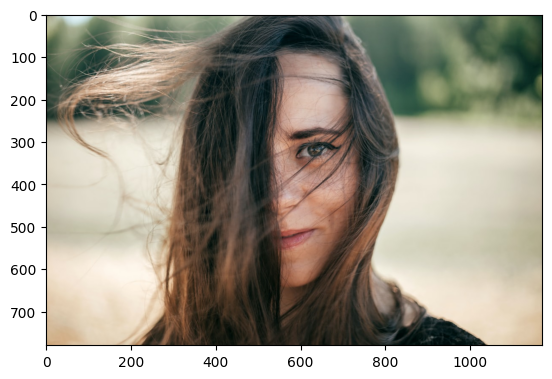

In [2]:
import requests
import urllib.request

url = "https://images.unsplash.com/photo-1683883968301-65419919bcc4?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80"
urllib.request.urlretrieve(url,"test.jpeg")
img = Image.open(r"test.jpeg")
print(img.mode)
img_array=np.array(img)
print(np.shape(img_array))
plt.imshow(img)

(512, 512, 3)


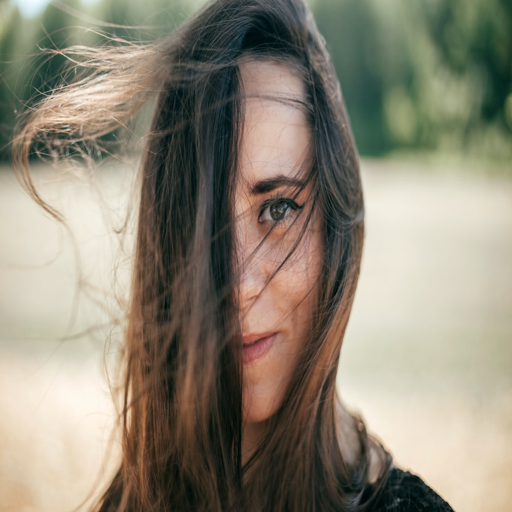

In [3]:
img=img.resize([512,512])
img_array=np.array(img)
print(np.shape(img_array))
img_array=img_array.reshape(1,1,512,512,3)
img

In [4]:
model=None
model=keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,512,512,3),name='input'),

    keras.layers.ConvLSTM2D(512,(3,3),activation='relu',padding='same',name='1st'),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Reshape((1,256,256,512)),
    keras.layers.ConvLSTM2D(256,(3,3),activation='relu',padding='same',name='first'),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Reshape((1,128,128,256)),
    keras.layers.ConvLSTM2D(256,(3,3),activation='relu',padding='same',name='12th'),
    keras.layers.UpSampling2D(2),

    keras.layers.Reshape((1,256,256,256)),
    keras.layers.ConvLSTM2D(512,(3,3),activation='relu',padding='same',name='13th'),
    keras.layers.UpSampling2D(2),


    keras.layers.Conv2D(3,(3,3),padding='same',name='last')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st (ConvLSTM2D)            (None, 512, 512, 512)     9494528   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 512)    0         
 )                                                               
                                                                 
 reshape (Reshape)           (None, 1, 256, 256, 512)  0         
                                                                 
 first (ConvLSTM2D)          (None, 256, 256, 256)     7078912   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 256)    0         
 2D)                                                             
                                                                 
 reshape_1 (Reshape)         (None, 1, 128, 128, 256)  0

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [7]:
history=model.fit(img_array,img_array,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 24s 24s/step - loss: 22660.1875
Epoch 2/1200
1/1 [==============================] - 2s 2s/step - loss: 11175.8271
Epoch 3/1200
1/1 [==============================] - 2s 2s/step - loss: 430053.8750
Epoch 4/1200
1/1 [==============================] - 2s 2s/step - loss: 2731.8308
Epoch 5/1200
1/1 [==============================] - 2s 2s/step - loss: 18292.0957
Epoch 6/1200
1/1 [==============================] - 2s 2s/step - loss: 21981.5449
Epoch 7/1200
1/1 [==============================] - 2s 2s/step - loss: 22573.7891
Epoch 8/1200
1/1 [==============================] - 2s 2s/step - loss: 22642.4121
Epoch 9/1200
1/1 [==============================] - 2s 2s/step - loss: 22652.6934
Epoch 10/1200
1/1 [==============================] - 2s 2s/step - loss: 22653.4883
Epoch 11/1200
1/1 [==============================] - 2s 2s/step - loss: 22646.6641
Epoch 12/1200
1/1 [==============================] - 2s 2s/step - loss: 22610.7246
Epoch 13/12

In [8]:
pred=model.predict(img_array)
np.size(pred)

1/1 [==============================] - 1s 874ms/step


786432

(512, 512, 3)


Text(0.5, 1.0, 'reconstructed')

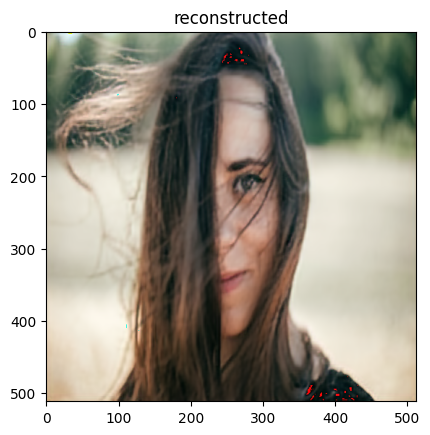

In [9]:
pred=pred.reshape(512,512,3)
print(np.shape(pred))
compressed_img=Image.fromarray( (pred).astype("uint8"))
plt.imshow(compressed_img)
plt.title("reconstructed")

In [10]:
import math
# Calculate compression rate
num_bits = model.count_params() * 32  # total number of bits used to represent the model
num_pixels = 512 * 512 * 3  # total number of pixels in the original image
compression_rate_Lstmconv = num_bits / num_pixels
print("compression rate:", compression_rate_Lstmconv)

# Calculate PSNR, SSI, and MSE
orig_img_array = np.array(img)
compressed_img_array = np.array(compressed_img)

max_pixel_val = 255

mse_Lstmconv = np.mean((orig_img_array - compressed_img_array) ** 2)
psnr_Lstmconv = 20 * math.log10(max_pixel_val / math.sqrt(mse_Lstmconv))
ssi_Lstmconv = np.sum((orig_img_array - np.mean(orig_img_array)) * (compressed_img_array - np.mean(compressed_img_array))) / np.sqrt(np.sum((orig_img_array - np.mean(orig_img_array)) ** 2) * np.sum((compressed_img_array - np.mean(compressed_img_array)) ** 2))

print("Lstmconv PSNR:", psnr_Lstmconv)
print("Lstmconv SSI:", ssi_Lstmconv)
print("Lstmconv MSE:", mse_Lstmconv)

compression rate: 1443.0626220703125
Lstmconv PSNR: 34.88524078619745
Lstmconv SSI: 0.9947211804078849
Lstmconv MSE: 21.11330795288086


<AxesSubplot: >

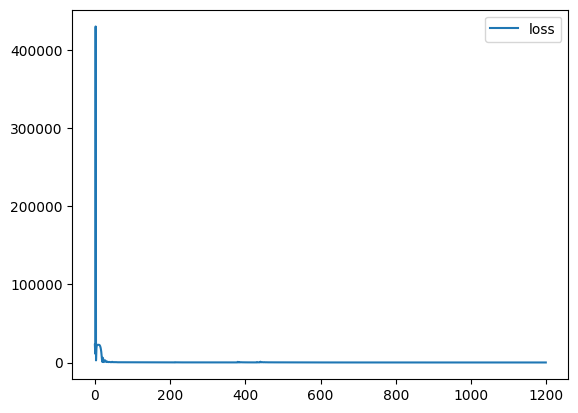

In [11]:
import pandas as pd
history=pd.DataFrame(history.history)
history.plot()